In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
train_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/train_df.parquet")

In [3]:
val_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/val_df.parquet")

In [4]:
test_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/test_df.parquet")

In [12]:
def plot_occurrences(df, filename):
    """Creates a bar plot of the occurrences of each slogan in the DataFrame."""

    occurrences = df.sum(axis=0)
    occurrences = occurrences.sort_values(
        ascending=True
    )  # Ordina in modo ascendente per il grafico a barre orizzontali

    # Seleziona solo le prime 50 occorrenze
    # occurrences = occurrences[-40:]

    plt.figure(figsize=(15, 18))  # Aumenta le dimensioni del grafico

    plt.barh(
        occurrences.index, occurrences.values
    )  # Crea un grafico a barre orizzontali
    plt.ylabel("Slogan")
    plt.xlabel("Occorrenze")
    plt.title("Occorrenze di Slogan nel Dataset")

    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.tight_layout()  # Assicura che tutto sia visibile quando si salva l'immagine
    plt.savefig(filename)
    plt.close()

In [13]:
plot_occurrences(train_df, "train_occurrences.png")
plot_occurrences(val_df, "val_occurrences.png")
plot_occurrences(test_df, "test_occurrences.png")

In [15]:
dataset = pd.read_parquet("real-time clusters/result_df_gt_2.parquet")

In [16]:
occurrences = dataset.sum(axis=0)
occurrences = occurrences.sort_values(ascending=False)

In [17]:
occurrences

apparato isolato                                      176702
cell logical channel availability supervision         176130
base station connectivity problem                     152039
signal degraded                                       143259
fermo parziale gsm                                    133581
                                                       ...  
cardinitcard initializing                                  1
net specific problem non inviato da agent                  1
unidentified specific problem non inviato da agent         1
guasto bus di comunicazione                                1
crdpwroff card power off xexc xexc                         1
Length: 114, dtype: int64

In [18]:
def plot_occurrences(dfs, labels, filename):
    """Creates a bar plot of the occurrences of each slogan in the DataFrames."""

    plt.figure(figsize=(15, 15))  

    for df, label in zip(dfs, labels):
        occurrences = df.sum(axis=0)
        occurrences = occurrences.sort_values(
            ascending=True
        )  
        plt.barh(
            occurrences.index, occurrences.values, alpha=0.5, label=label
        )  

    plt.ylabel("Slogan")
    plt.xlabel("Occorrenze")
    plt.title("Occorrenze di Slogan nel Dataset")
    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.tight_layout()  
    plt.savefig(filename)
    plt.close()


plot_occurrences(
    [train_df, test_df, val_df], ["Train", "Test", "Validation"], "occurrences.png"
)

In [19]:
def plot_percentage_occurrences(dfs, labels, colors, filename):
    """Crea un grafico a barre delle percentuali di occorrenze di ciascun slogan nei DataFrame."""

    plt.figure(figsize=(15, 15))  

    for df, label, color in zip(dfs, labels, colors):
        occurrences = df.sum(axis=0)
        percentages = occurrences / df.sum().sum() * 100  
        percentages = percentages.sort_values(
            ascending=True
        )  
        plt.barh(
            percentages.index, percentages.values, color=color, alpha=0.5, label=label
        )  

    plt.ylabel("Slogan")
    plt.xlabel("Percentuale (%)")
    plt.title("Percentuale di Occorrenze di Slogan nel Dataset")
    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.tight_layout()  
    plt.savefig(filename)
    plt.close()


# Chiamata alla funzione con i colori specificati
plot_percentage_occurrences(
    [train_df, test_df, val_df],
    ["Train", "Test", "Validation"],
    ["red", "grey", "yellow"],
    "percentage_occurrences.png",
)

In [20]:
print("Occurrences in Train\n")
occurrences_train = train_df.sum(axis=0)
occurrences_train = occurrences_train[occurrences_train == 0].sort_values(
    ascending=True
)
print(occurrences_train)
print("-----------------------------------------------------------")
print("Occurrences in Test\n")
occurrences_test = test_df.sum(axis=0)
occurrences_test = occurrences_test[occurrences_test == 0].sort_values(ascending=True)
print(occurrences_test)
print("-----------------------------------------------------------")
print("Occurrences in Validation\n")
occurrences_val = val_df.sum(axis=0)
occurrences_val = occurrences_val[occurrences_val == 0].sort_values(ascending=True)
print(occurrences_val)

Occurrences in Train

vc unequipped ho vc unequipped                        0
net specific problem non inviato da agent             0
unidentified specific problem non inviato da agent    0
dtype: int64
-----------------------------------------------------------
Occurrences in Test

oproutgoing channel optical power out of range xexc zb    0
guasto bus di comunicazione                               0
cardinitcard initializing                                 0
net specific problem non inviato da agent                 0
serversignalfailure odu ssf                               0
unidentified specific problem non inviato da agent        0
crdpwroff card power off xexc xexc                        0
dtype: int64
-----------------------------------------------------------
Occurrences in Validation

None                                  0
guasto bus di comunicazione           0
cardinitcard initializing             0
vc unequipped ho vc unequipped        0
serversignalfailure odu ssf         

In [21]:
occurrences = test_df.sum(axis=0)
occurrences_df = occurrences.to_frame("occurrences")
occurrences_df = occurrences_df.sort_values(by="occurrences", ascending=False)
occurrences_df = occurrences_df.reset_index()
occurrences_df = occurrences_df.rename(columns={"index": "slogan"})

In [22]:
occurrences_df

,slogan,occurrences
0,cell logical channel availability supervision,26676
1,apparato isolato,26603
2,base station connectivity problem,22687
3,signal degraded,21426
4,fermo parziale gsm,20073
...,...,...
109,oproutgoing channel optical power out of range...,0
110,net specific problem non inviato da agent,0
111,cardinitcard initializing,0
112,guasto bus di comunicazione,0


In [23]:
df = pd.read_csv("f1.csv")

In [24]:
merge_df = pd.merge(occurrences_df, df, on="slogan", how="left")

In [25]:
merge_df

,slogan,occurrences,f1
0,cell logical channel availability supervision,26676,0.999701
1,apparato isolato,26603,0.982419
2,base station connectivity problem,22687,0.999912
3,signal degraded,21426,0.999858
4,fermo parziale gsm,20073,0.999550
...,...,...,...
109,oproutgoing channel optical power out of range...,0,0.000000
110,net specific problem non inviato da agent,0,0.000000
111,cardinitcard initializing,0,0.000000
112,guasto bus di comunicazione,0,0.000000


In [26]:
merge_df.to_csv("merge_df.csv", index=False)

In [27]:
train_occurrences = train_df.sum(axis=0)
train_occurrences_df = train_occurrences.to_frame("occurrences")
train_occurrences_df = train_occurrences_df.sort_values(
    by="occurrences", ascending=False
)
train_occurrences_df = train_occurrences_df.reset_index()
train_occurrences_df = train_occurrences_df.rename(columns={"index": "slogan"})

In [28]:
val_occurrences = val_df.sum(axis=0)
val_occurrences_df = val_occurrences.to_frame("occurrences")
val_occurrences_df = val_occurrences_df.sort_values(by="occurrences", ascending=False)
val_occurrences_df = val_occurrences_df.reset_index()
val_occurrences_df = val_occurrences_df.rename(columns={"index": "slogan"})

In [29]:
test_occurrences = test_df.sum(axis=0)
test_occurrences_df = test_occurrences.to_frame("occurrences")
test_occurrences_df = test_occurrences_df.sort_values(by="occurrences", ascending=False)
test_occurrences_df = test_occurrences_df.reset_index()
test_occurrences_df = test_occurrences_df.rename(columns={"index": "slogan"})

In [30]:
total_occurrences_train = train_occurrences_df["occurrences"].sum()

train_occurrences_df["percentage"] = (
    train_occurrences_df["occurrences"] / total_occurrences_train
) * 100

total_occurrences_test = test_occurrences_df["occurrences"].sum()

test_occurrences_df["percentage"] = (
    test_occurrences_df["occurrences"] / total_occurrences_test
) * 100


total_occurrences_val = val_occurrences_df["occurrences"].sum()

val_occurrences_df["percentage"] = (
    val_occurrences_df["occurrences"] / total_occurrences_val
) * 100

In [31]:
# Unisci i DataFrame su 'slogan'
merged_df = pd.merge(
    train_occurrences_df, test_occurrences_df, on="slogan", suffixes=("_train", "_test")
)
merged_df = pd.merge(merged_df, val_occurrences_df, on="slogan")


merged_df = merged_df.rename(columns={"percentage": "percentage_val"})

# Calcola la differenza assoluta tra le percentuali
merged_df["diff_train_test"] = abs(
    merged_df["percentage_train"] - merged_df["percentage_test"]
)
merged_df["diff_train_val"] = abs(
    merged_df["percentage_train"] - merged_df["percentage_val"]
)
merged_df["diff_test_val"] = abs(
    merged_df["percentage_test"] - merged_df["percentage_val"]
)

merged_df = merged_df.drop(
    columns=["occurrences_train", "occurrences_test", "occurrences"]
)
merged_df = merged_df.drop(
    columns=["percentage_train", "percentage_test", "percentage_val"]
)
merged_df

,slogan,diff_train_test,diff_train_val,diff_test_val
0,apparato isolato,0.006925,0.066427,0.073352
1,cell logical channel availability supervision,0.065384,0.026081,0.091465
2,base station connectivity problem,0.034414,0.085312,0.119726
3,signal degraded,0.025045,0.032330,0.057375
4,fermo parziale gsm,0.002857,0.026531,0.023674
...,...,...,...,...
109,guasto bus di comunicazione,0.000059,0.000059,0.000000
110,crdpwroff card power off xexc xexc,0.000059,0.000059,0.000000
111,vc unequipped ho vc unequipped,0.000274,0.000000,0.000274
112,net specific problem non inviato da agent,0.000000,0.000275,0.000275


In [32]:
mean_diff_train_test = merged_df["diff_train_test"].mean()
mean_diff_train_val = merged_df["diff_train_val"].mean()
mean_diff_test_val = merged_df["diff_test_val"].mean()

print(f"Media della differenza tra train e test: {mean_diff_train_test}")
print(f"Media della differenza tra train e val: {mean_diff_train_val}")
print(f"Media della differenza tra test e val: {mean_diff_test_val}")

Media della differenza tra train e test: 0.009438409078508968
Media della differenza tra train e val: 0.010064281373728815
Media della differenza tra test e val: 0.015039450224463805


In [34]:
f1_score = pd.read_csv("f1.csv")

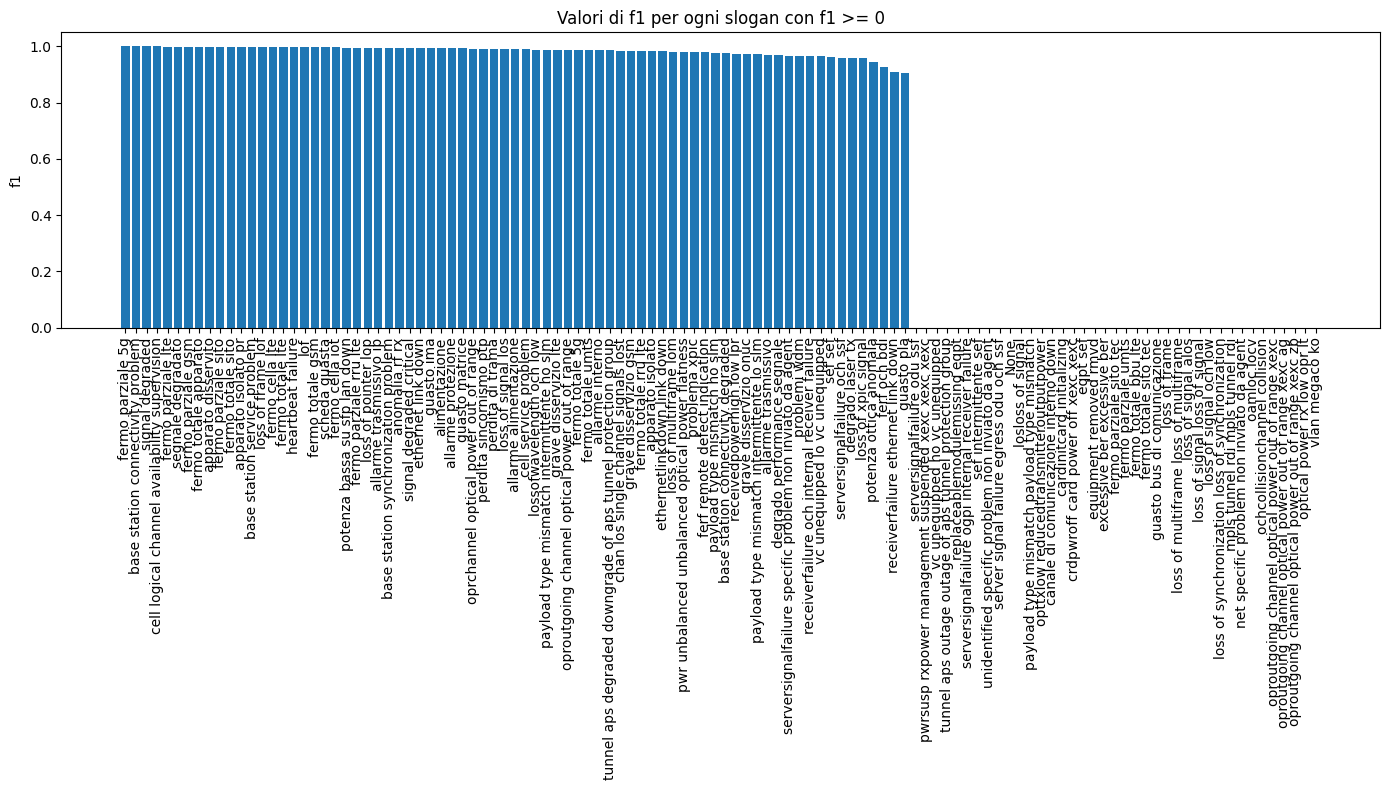

In [35]:
import matplotlib.pyplot as plt

# Supponendo che f1_score sia un DataFrame con colonne 'slogan' e 'f1'
f1_score = f1_score.fillna("None").sort_values(by="f1", ascending=False)

# Supponiamo che il valore sia 0.5
value = 0

f1_score_filtered = f1_score.loc[f1_score['f1'] >= value]

# Ora puoi plottare il DataFrame filtrato
plt.figure(figsize=(14, 8))  # Imposta le dimensioni del grafico
plt.bar(f1_score_filtered['slogan'], f1_score_filtered['f1'])  # Crea un grafico a barre
plt.ylabel('f1')  # Imposta l'etichetta dell'asse y
plt.title('Valori di f1 per ogni slogan con f1 >= {}'.format(value))  # Imposta il titolo del grafico
plt.xticks(rotation=90)  # Ruota le etichette dell'asse x di 90 gradi per una migliore leggibilità
plt.tight_layout()  # Assicura che tutto sia visibile quando si salva l'immagine
plt.show()  # Mostra il grafico

In [30]:
merge_df = pd.read_csv("merge_df.csv")

In [31]:
merge_df.fillna("None", inplace=True)

In [36]:
merge_df

,slogan,occurrences,f1
0,cell logical channel availability supervision,26676,0.999701
1,apparato isolato,26603,0.982419
2,base station connectivity problem,22687,0.999912
3,signal degraded,21426,0.999858
4,fermo parziale gsm,20073,0.999550
...,...,...,...
109,oproutgoing channel optical power out of range...,0,0.000000
110,net specific problem non inviato da agent,0,0.000000
111,cardinitcard initializing,0,0.000000
112,guasto bus di comunicazione,0,0.000000


In [45]:
# Filtra il DataFrame per includere solo le righe con 'occurrences' > 20
filtered_df = merge_df[merge_df['occurrences'] > 0]

In [46]:
filtered_df

,slogan,occurrences,f1
0,cell logical channel availability supervision,26676,0.999701
1,apparato isolato,26603,0.982419
2,base station connectivity problem,22687,0.999912
3,signal degraded,21426,0.999858
4,fermo parziale gsm,20073,0.999550
...,...,...,...
102,canale di comunicazione interno down,9,0.000000
103,replaceablemodulemissing eqpt,8,0.000000
104,oproutgoing channel optical power out of range...,6,0.000000
105,None,2,NaN


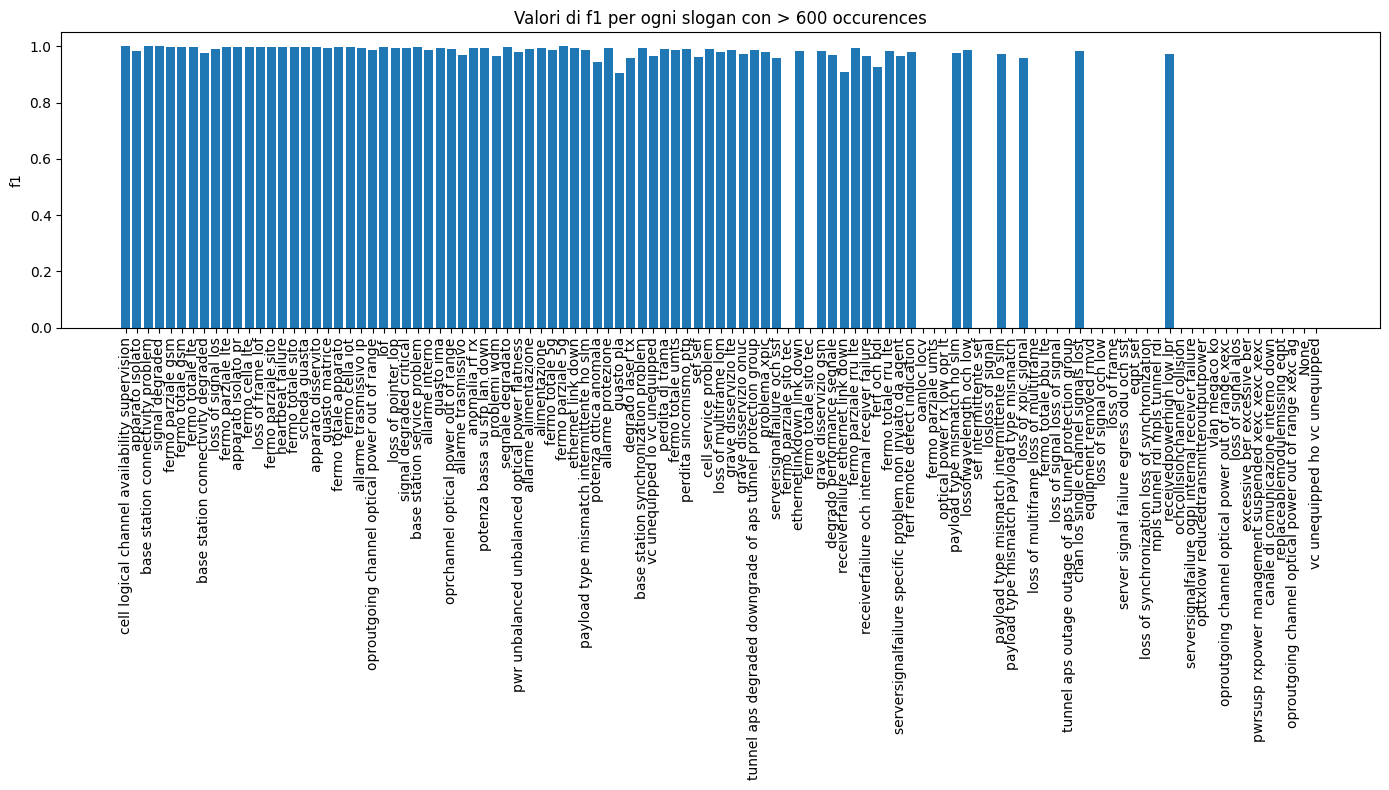

In [47]:
# Ora puoi plottare il DataFrame filtrato
plt.figure(figsize=(14, 8))  # Imposta le dimensioni del grafico
plt.bar(filtered_df['slogan'], filtered_df['f1'])  # Crea un grafico a barre
plt.ylabel('f1')  # Imposta l'etichetta dell'asse y
plt.title('Valori di f1 per ogni slogan con > 600 occurences'.format(value))  # Imposta il titolo del grafico
plt.xticks(rotation=90)  # Ruota le etichette dell'asse x di 90 gradi per una migliore leggibilità
plt.tight_layout()  # Assicura che tutto sia visibile quando si salva l'immagine
plt.show() 